### 觀察2024.01~2025.04 之原始與調整後腳3績效差異
因為PCP中的腳1、期貨都沒有做更動，所以想說可以著重觀察腳3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
from datetime import datetime, timedelta
import re
import os
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.gridspec as gridspec
from matplotlib.font_manager import FontProperties as font
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei') # 在圖表上顯示中文
import matplotlib.ticker as mtick
from collections import Counter
import seaborn as sns

##### 持有跨夜

In [33]:
# 設定資料夾路徑
base_path = r'D:\CODE\SC_SP_delay\持有跨夜'

# 設定要讀取的年份與月份範圍
years = [2024, 2025]  # 你可以擴展年份範圍
months = [f"{month:02d}" for month in range(1, 13)]  # 產生 '01', '02', ..., '12'

# 儲存所有 DataFrame
df_list = []

# 迴圈讀取不同年份與月份的數據
for year in years:
    for month in months:
        file_path = f"{base_path}\\{month}_{year}.csv"
        try:
            df = pd.read_csv(file_path, encoding='utf-8-sig')
            df["Year"] = year  # **新增年份欄位**
            df_list.append(df)
            print(f"成功讀取: {file_path}")
        except FileNotFoundError:
            print(f"檔案不存在: {file_path}")

# 合併所有 DataFrame
df = pd.concat(df_list, ignore_index=True)
# 去除包含空值的數據
df = df.dropna()

成功讀取: D:\CODE\SC_SP_delay\持有跨夜\01_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\02_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\03_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\04_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\05_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\06_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\07_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\08_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\09_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\10_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\11_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\12_2024.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\01_2025.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\02_2025.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\03_2025.csv
成功讀取: D:\CODE\SC_SP_delay\持有跨夜\04_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\持有跨夜\05_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\持有跨夜\06_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\持有跨夜\07_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\持有跨夜\08_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\持有跨夜\09_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\持有跨夜\10_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\持有跨夜\11_2025.csv
檔案不存

In [34]:
#df = df[df['Year'] == 2024]
df = df[df['Year'] == 2025]

In [35]:
# 計算累積PCP比數
cumulative_pcp = df["Price_Diff_Change"].count()

# 計算總損益
total_profit_loss = df["Price_Diff_Change_50X"].sum()

# 計算平均每筆PCP損益
average_profit_loss_per_pcp = total_profit_loss / len(df) if len(df) > 0 else 0

# 顯示結果
print("累積PCP比數:", cumulative_pcp)
print("總損益:", total_profit_loss)
print("平均每筆PCP損益:", average_profit_loss_per_pcp)

累積PCP比數: 661
總損益: 3323461.0970618934
平均每筆PCP損益: 5027.929042453697


count     661.000000
mean      100.558581
std       445.213691
min      -370.038462
25%       -27.300000
50%         5.891304
75%        90.163636
max      2392.000000
Name: Price_Diff_Change, dtype: float64


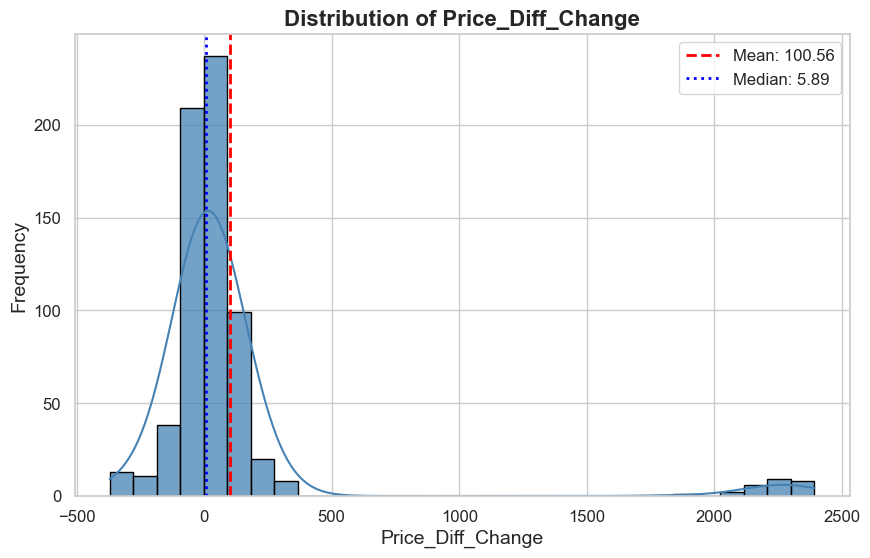

In [36]:
# 設置 Seaborn 風格
sns.set(style="whitegrid")

# **計算統計描述**
price_diff_stats = df["Price_Diff_Change"].describe()
print(price_diff_stats)

# **繪製美觀的分布圖**
plt.figure(figsize=(10, 6))
sns.histplot(df["Price_Diff_Change"], bins=30, kde=True, color="steelblue", edgecolor="black", alpha=0.75)

# **添加均值和中位數線**
mean_value = df["Price_Diff_Change"].mean()
median_value = df["Price_Diff_Change"].median()
plt.axvline(mean_value, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color="blue", linestyle="dotted", linewidth=2, label=f"Median: {median_value:.2f}")

# **美化標籤與標題**
plt.xlabel("Price_Diff_Change", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Price_Diff_Change", fontsize=16, fontweight="bold")
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# **顯示圖表**
plt.show()


In [37]:
count_df = pd.DataFrame({
    "Condition": ["Price_Diff_Change >= 0", "Price_Diff_Change <= 0",
                  "Price_Diff_Change >= 40", "Price_Diff_Change <= -40",
                  "Price_Diff_Change >= 20", "Price_Diff_Change <= -20"],
    "Count": [len(df[df["Price_Diff_Change"] >= 0]),
              len(df[df["Price_Diff_Change"] <= 0]),
              len(df[df["Price_Diff_Change"] >= 40]),
              len(df[df["Price_Diff_Change"] <= -40]),
              len(df[df["Price_Diff_Change"] >= 20]),
              len(df[df["Price_Diff_Change"] <= -20])]
})

# 顯示結果
print(count_df)

                  Condition  Count
0    Price_Diff_Change >= 0    370
1    Price_Diff_Change <= 0    292
2   Price_Diff_Change >= 40    253
3  Price_Diff_Change <= -40    143
4   Price_Diff_Change >= 20    276
5  Price_Diff_Change <= -20    176


SC Strategy Stats:
count    534.000000
mean       6.040455
std      103.284304
min     -370.038462
25%      -41.500000
50%        2.248950
75%       70.050000
max      308.333333
Name: Price_Diff_Change, dtype: float64

SP Strategy Stats:
count     127.000000
mean      497.981250
std       892.235584
min       -77.968254
25%        -2.545455
50%        28.500000
75%       222.116667
max      2392.000000
Name: Price_Diff_Change, dtype: float64


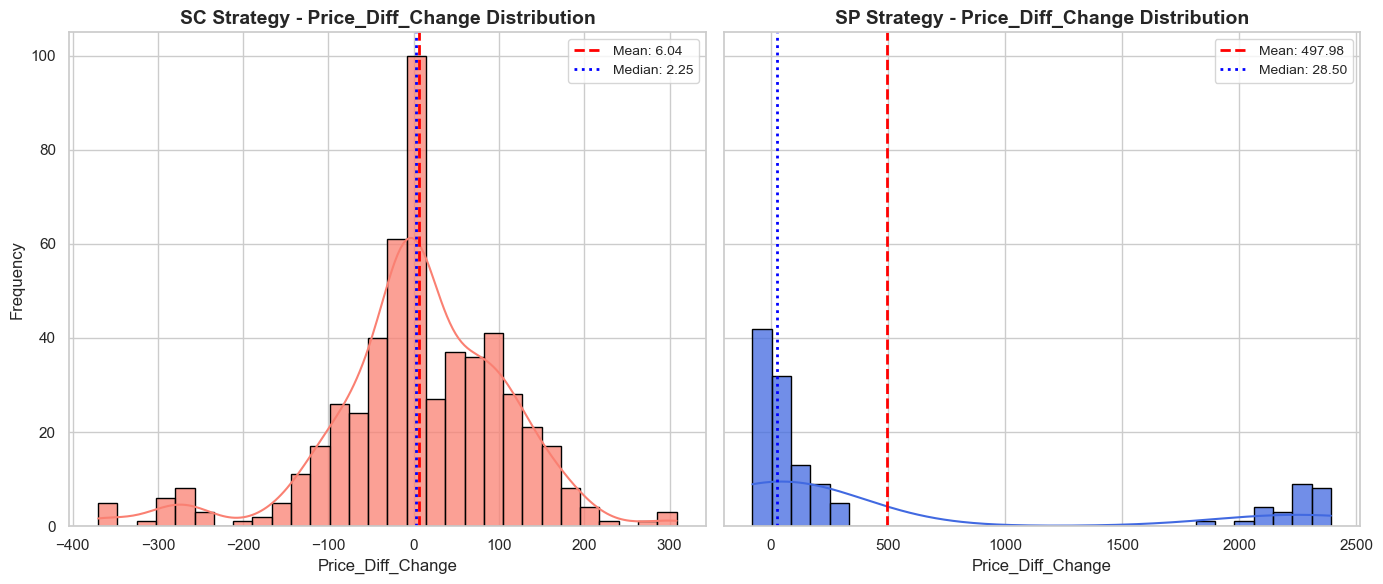

In [38]:
# 設置 Seaborn 風格
sns.set(style="whitegrid")

# **分割 SC / SP 數據**
df_sc = df[df["ArbitrageStrategy"] == "SC"]
df_sp = df[df["ArbitrageStrategy"] == "SP"]

# **計算統計描述**
print("SC Strategy Stats:")
print(df_sc["Price_Diff_Change"].describe())
print("\nSP Strategy Stats:")
print(df_sp["Price_Diff_Change"].describe())

# **繪製分布圖**
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# **SC 分布圖**
sns.histplot(df_sc["Price_Diff_Change"], bins=30, kde=True, color="salmon", edgecolor="black", alpha=0.75, ax=axes[0])
axes[0].axvline(df_sc["Price_Diff_Change"].mean(), color="red", linestyle="dashed", linewidth=2, label=f"Mean: {df_sc['Price_Diff_Change'].mean():.2f}")
axes[0].axvline(df_sc["Price_Diff_Change"].median(), color="blue", linestyle="dotted", linewidth=2, label=f"Median: {df_sc['Price_Diff_Change'].median():.2f}")
axes[0].set_title("SC Strategy - Price_Diff_Change Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Price_Diff_Change", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].legend(fontsize=10)

# **SP 分布圖**
sns.histplot(df_sp["Price_Diff_Change"], bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.75, ax=axes[1])
axes[1].axvline(df_sp["Price_Diff_Change"].mean(), color="red", linestyle="dashed", linewidth=2, label=f"Mean: {df_sp['Price_Diff_Change'].mean():.2f}")
axes[1].axvline(df_sp["Price_Diff_Change"].median(), color="blue", linestyle="dotted", linewidth=2, label=f"Median: {df_sp['Price_Diff_Change'].median():.2f}")
axes[1].set_title("SP Strategy - Price_Diff_Change Distribution", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Price_Diff_Change", fontsize=12)
axes[1].legend(fontsize=10)

# **調整間距**
plt.tight_layout()
plt.show()


In [39]:
# **計算 SC 和 SP 的個數**
sc_count = len(df[df["ArbitrageStrategy"] == "SC"])
sp_count = len(df[df["ArbitrageStrategy"] == "SP"])

# **計算 SC 和 SP 的累積損益**
sc_total_pnl = df[df["ArbitrageStrategy"] == "SC"]["Price_Diff_Change_50X"].sum()
sp_total_pnl = df[df["ArbitrageStrategy"] == "SP"]["Price_Diff_Change_50X"].sum()

# **計算 SC 和 SP 的平均 PnL**
sc_avg_pnl = sc_total_pnl / sc_count if sc_count > 0 else 0
sp_avg_pnl = sp_total_pnl / sp_count if sp_count > 0 else 0

# **整理成 DataFrame**
pnl_summary = pd.DataFrame({
    "Strategy": ["SC", "SP"],
    "Count": [sc_count, sp_count],
    "Total_PnL": [sc_total_pnl, sp_total_pnl],
    "Avg_PnL_per_Trade": [sc_avg_pnl, sp_avg_pnl]  # 每筆交易的平均 PnL
})

# **顯示結果**
print(pnl_summary)


  Strategy  Count     Total_PnL  Avg_PnL_per_Trade
0       SC    534  1.612802e+05         302.022771
1       SP    127  3.162181e+06       24899.062498


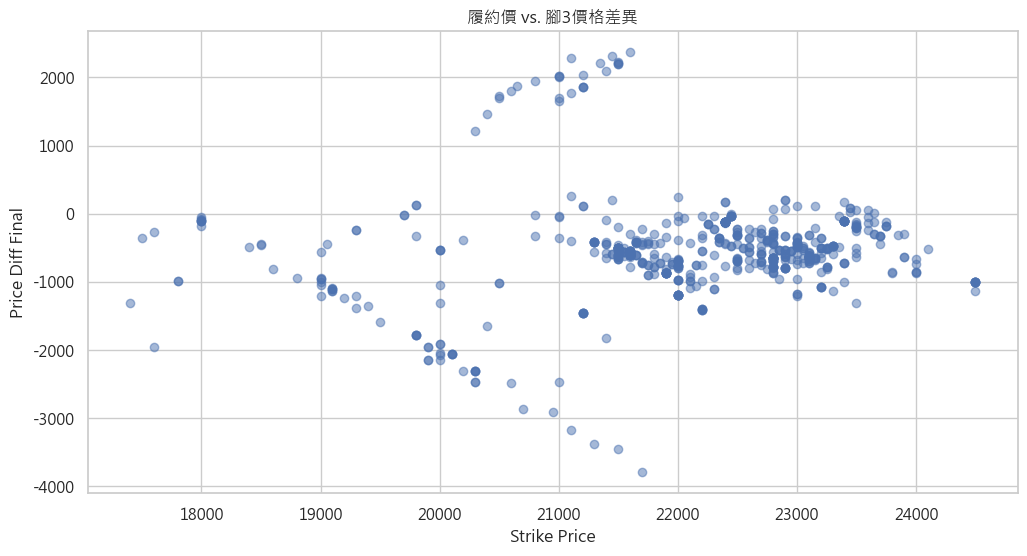

In [40]:
from matplotlib.font_manager import FontProperties as font
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei') # 在圖表上顯示中文

# 繪製履約價 vs. 最終價格差異的散點圖
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(df["StrikePrice"], df["Price_Diff_Final"], alpha=0.5)
plt.xlabel("Strike Price")
plt.ylabel("Price Diff Final")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}"))  # 確保負號能正常顯示
plt.title("履約價 vs. 腳3價格差異")
plt.show()


<Axes: xlabel='StrikePrice', ylabel='Price_Diff_Final'>

c:\Users\ptdintern1.fut\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  func(*args, **kwargs)
c:\Users\ptdintern1.fut\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


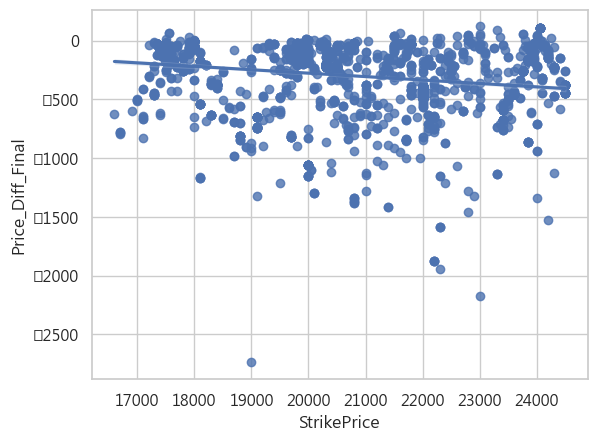

In [44]:
sns.regplot(x=df["StrikePrice"], y=df["Price_Diff_Final"])

##### 不持有跨夜

In [41]:
# 設定資料夾路徑
base_path = r'D:\CODE\SC_SP_delay\不持有跨夜'

# 設定要讀取的年份與月份範圍
years = [2024, 2025]  # 你可以擴展年份範圍
months = [f"{month:02d}" for month in range(1, 13)]  # 產生 '01', '02', ..., '12'

# 儲存所有 DataFrame
df_list = []

# 迴圈讀取不同年份與月份的數據
for year in years:
    for month in months:
        file_path = f"{base_path}\\{month}_{year}.csv"
        try:
            df = pd.read_csv(file_path, encoding='utf-8-sig')
            df["Year"] = year  # **新增年份欄位**
            df_list.append(df)
            print(f"成功讀取: {file_path}")
        except FileNotFoundError:
            print(f"檔案不存在: {file_path}")

# 合併所有 DataFrame
df = pd.concat(df_list, ignore_index=True)
# 去除包含空值的數據
df = df.dropna()

成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\01_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\02_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\03_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\04_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\05_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\06_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\07_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\08_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\09_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\10_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\11_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\12_2024.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\01_2025.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\02_2025.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\03_2025.csv
成功讀取: D:\CODE\SC_SP_delay\不持有跨夜\04_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\不持有跨夜\05_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\不持有跨夜\06_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\不持有跨夜\07_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\不持有跨夜\08_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\不持有跨夜\09_2025.csv
檔案不存在: D:\CODE\SC_SP_delay\不持有跨夜\10_2025.csv
檔案不存在: D:\CODE\SC_SP_delay

In [42]:
#df = df[df['Year'] == 2024]
df = df[df['Year'] == 2025]

In [43]:
# 計算累積PCP比數
cumulative_pcp = df["Price_Diff_Change"].count()

# 計算總損益
total_profit_loss = df["Price_Diff_Change_50X"].sum()

# 計算平均每筆PCP損益
average_profit_loss_per_pcp = total_profit_loss / len(df) if len(df) > 0 else 0

# 顯示結果
print("累積PCP比數:", cumulative_pcp)
print("總損益:", total_profit_loss)
print("平均每筆PCP損益:", average_profit_loss_per_pcp)

累積PCP比數: 447
總損益: 991655.6576074732
平均每筆PCP損益: 2218.469032678911


count    447.000000
mean      44.369381
std       75.309262
min      -91.111111
25%       -7.679487
50%       13.637681
75%       90.615476
max      309.000000
Name: Price_Diff_Change, dtype: float64


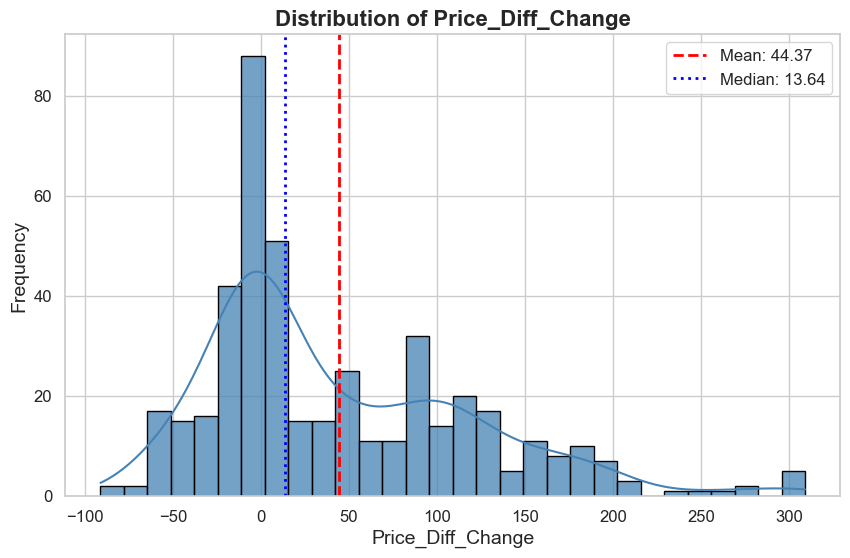

In [44]:
# 設置 Seaborn 風格
sns.set(style="whitegrid")

# **計算統計描述**
price_diff_stats = df["Price_Diff_Change"].describe()
print(price_diff_stats)

# **繪製美觀的分布圖**
plt.figure(figsize=(10, 6))
sns.histplot(df["Price_Diff_Change"], bins=30, kde=True, color="steelblue", edgecolor="black", alpha=0.75)

# **添加均值和中位數線**
mean_value = df["Price_Diff_Change"].mean()
median_value = df["Price_Diff_Change"].median()
plt.axvline(mean_value, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color="blue", linestyle="dotted", linewidth=2, label=f"Median: {median_value:.2f}")

# **美化標籤與標題**
plt.xlabel("Price_Diff_Change", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Distribution of Price_Diff_Change", fontsize=16, fontweight="bold")
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# **顯示圖表**
plt.show()


In [45]:
count_df = pd.DataFrame({
    "Condition": ["Price_Diff_Change >= 0", "Price_Diff_Change <= 0",
                  "Price_Diff_Change >= 40", "Price_Diff_Change <= -40",
                  "Price_Diff_Change >= 20", "Price_Diff_Change <= -20"],
    "Count": [len(df[df["Price_Diff_Change"] >= 0]),
              len(df[df["Price_Diff_Change"] <= 0]),
              len(df[df["Price_Diff_Change"] >= 40]),
              len(df[df["Price_Diff_Change"] <= -40]),
              len(df[df["Price_Diff_Change"] >= 20]),
              len(df[df["Price_Diff_Change"] <= -20])]
})

# 顯示結果
print(count_df)

                  Condition  Count
0    Price_Diff_Change >= 0    281
1    Price_Diff_Change <= 0    167
2   Price_Diff_Change >= 40    195
3  Price_Diff_Change <= -40     34
4   Price_Diff_Change >= 20    211
5  Price_Diff_Change <= -20     61


SC Strategy Stats:
count    355.000000
mean      43.764479
std       71.854664
min      -91.111111
25%       -9.023810
50%       13.637681
75%       91.207143
max      309.000000
Name: Price_Diff_Change, dtype: float64

SP Strategy Stats:
count     92.000000
mean      46.703514
std       87.775707
min      -77.968254
25%       -2.952381
50%        9.600000
75%       80.500000
max      298.000000
Name: Price_Diff_Change, dtype: float64


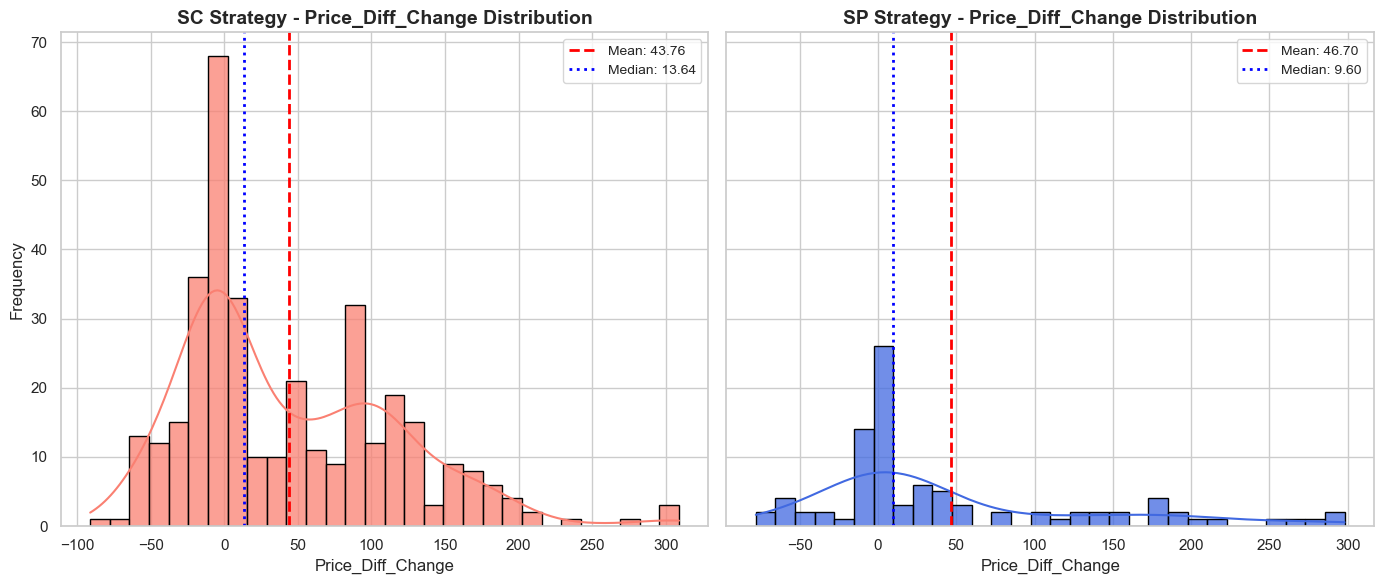

In [46]:
# 設置 Seaborn 風格
sns.set(style="whitegrid")

# **分割 SC / SP 數據**
df_sc = df[df["ArbitrageStrategy"] == "SC"]
df_sp = df[df["ArbitrageStrategy"] == "SP"]

# **計算統計描述**
print("SC Strategy Stats:")
print(df_sc["Price_Diff_Change"].describe())
print("\nSP Strategy Stats:")
print(df_sp["Price_Diff_Change"].describe())

# **繪製分布圖**
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# **SC 分布圖**
sns.histplot(df_sc["Price_Diff_Change"], bins=30, kde=True, color="salmon", edgecolor="black", alpha=0.75, ax=axes[0])
axes[0].axvline(df_sc["Price_Diff_Change"].mean(), color="red", linestyle="dashed", linewidth=2, label=f"Mean: {df_sc['Price_Diff_Change'].mean():.2f}")
axes[0].axvline(df_sc["Price_Diff_Change"].median(), color="blue", linestyle="dotted", linewidth=2, label=f"Median: {df_sc['Price_Diff_Change'].median():.2f}")
axes[0].set_title("SC Strategy - Price_Diff_Change Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Price_Diff_Change", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)
axes[0].legend(fontsize=10)

# **SP 分布圖**
sns.histplot(df_sp["Price_Diff_Change"], bins=30, kde=True, color="royalblue", edgecolor="black", alpha=0.75, ax=axes[1])
axes[1].axvline(df_sp["Price_Diff_Change"].mean(), color="red", linestyle="dashed", linewidth=2, label=f"Mean: {df_sp['Price_Diff_Change'].mean():.2f}")
axes[1].axvline(df_sp["Price_Diff_Change"].median(), color="blue", linestyle="dotted", linewidth=2, label=f"Median: {df_sp['Price_Diff_Change'].median():.2f}")
axes[1].set_title("SP Strategy - Price_Diff_Change Distribution", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Price_Diff_Change", fontsize=12)
axes[1].legend(fontsize=10)

# **調整間距**
plt.tight_layout()
plt.show()


In [47]:
# **計算 SC 和 SP 的個數**
sc_count = len(df[df["ArbitrageStrategy"] == "SC"])
sp_count = len(df[df["ArbitrageStrategy"] == "SP"])

# **計算 SC 和 SP 的累積損益**
sc_total_pnl = df[df["ArbitrageStrategy"] == "SC"]["Price_Diff_Change_50X"].sum()
sp_total_pnl = df[df["ArbitrageStrategy"] == "SP"]["Price_Diff_Change_50X"].sum()

# **計算 SC 和 SP 的平均 PnL**
sc_avg_pnl = sc_total_pnl / sc_count if sc_count > 0 else 0
sp_avg_pnl = sp_total_pnl / sp_count if sp_count > 0 else 0

# **整理成 DataFrame**
pnl_summary = pd.DataFrame({
    "Strategy": ["SC", "SP"],
    "Count": [sc_count, sp_count],
    "Total_PnL": [sc_total_pnl, sp_total_pnl],
    "Avg_PnL_per_Trade": [sc_avg_pnl, sp_avg_pnl]  # 每筆交易的平均 PnL
})

# **顯示結果**
print(pnl_summary)


  Strategy  Count      Total_PnL  Avg_PnL_per_Trade
0       SC    355  776819.494346        2188.223928
1       SP     92  214836.163261        2335.175688


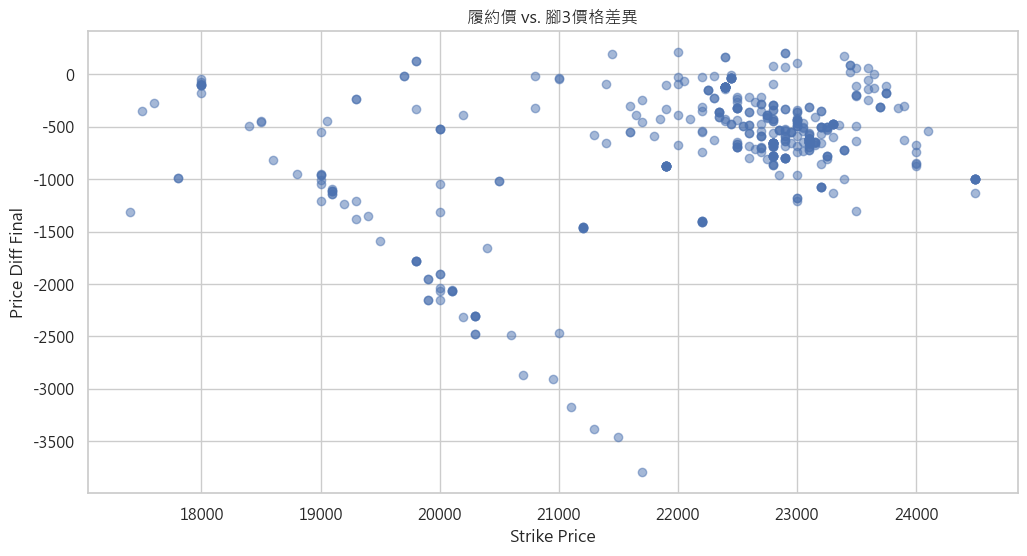

In [48]:
from matplotlib.font_manager import FontProperties as font
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei') # 在圖表上顯示中文

# 繪製履約價 vs. 最終價格差異的散點圖
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(df["StrikePrice"], df["Price_Diff_Final"], alpha=0.5)
plt.xlabel("Strike Price")
plt.ylabel("Price Diff Final")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}"))  # 確保負號能正常顯示
plt.title("履約價 vs. 腳3價格差異")
plt.show()


<Axes: xlabel='StrikePrice', ylabel='Price_Diff_Final'>

c:\Users\ptdintern1.fut\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  func(*args, **kwargs)
c:\Users\ptdintern1.fut\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


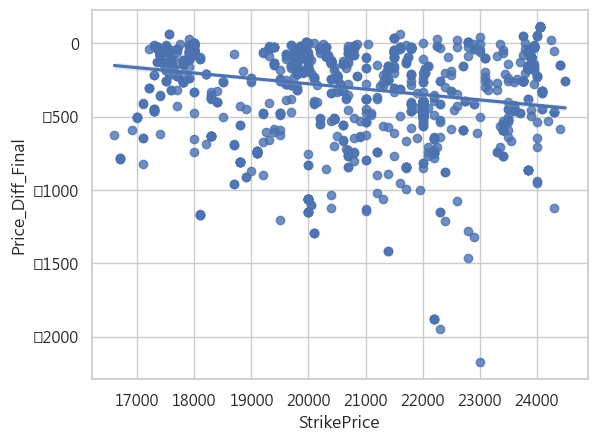

In [54]:
sns.regplot(x=df["StrikePrice"], y=df["Price_Diff_Final"])